In [1]:
from bs4 import BeautifulSoup 
import requests 

In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'
page = requests.get(url)
soup = BeautifulSoup(page.text , 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=docu

In [6]:
table = soup.find_all('table')[1]

In [13]:
table_columns_html =  table.find_all('th')

In [14]:
columns = [column.text.strip() for column in table_columns_html]
columns

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [15]:
import pandas as pd

In [29]:
df = pd.DataFrame(columns = columns)

In [30]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [18]:
table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [34]:
rows = table.find_all('tr')[1:]
for i , row in enumerate(rows):
    cols = row.find_all('td')
    cols_values = [col.text.strip() for col in cols]
    df.loc[i] = cols_values

In [40]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and Cloud Computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [37]:
headquarters = df["Headquarters"]
headquarters

0       Bentonville, Arkansas
1         Seattle, Washington
2               Spring, Texas
3       Cupertino, California
4       Minnetonka, Minnesota
               ...           
95       Richfield, Minnesota
96    New York City, New York
97          Chicago, Illinois
98     Waltham, Massachusetts
99      San Diego, California
Name: Headquarters, Length: 100, dtype: object

In [57]:
# Remove commas and percentage signs from relevant columns and convert to appropriate data types
df['Employees'] = df['Employees'].str.replace("," , "").astype(int)
df['Employees']

0     2100000
1     1540000
2       62000
3      164000
4      400000
       ...   
95      71100
96      34300
97      92795
98     130000
99      51000
Name: Employees, Length: 100, dtype: int32

In [55]:
df['Revenue growth'] = df['Revenue growth'].str.replace("%" , "").astype(float)
df['Revenue growth']

0      6.7
1      9.4
2     44.8
3      7.8
4     12.7
      ... 
95    10.6
96     0.5
97    82.5
98    14.5
99    31.7
Name: Revenue growth, Length: 100, dtype: float64

In [58]:
df.describe()

,Revenue (USD millions),Revenue growth,Employees
count,100.000000,100.000000,1.000000e+02
mean,117566.460000,19.576000,1.680631e+05
std,100915.112163,21.463397,2.717289e+05
min,44200.000000,0.500000,3.605000e+03
25%,57876.000000,4.375000,4.471150e+04
50%,80824.500000,11.700000,8.963850e+04
75%,138763.000000,23.625000,1.965125e+05
max,611289.000000,97.200000,2.100000e+06


In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

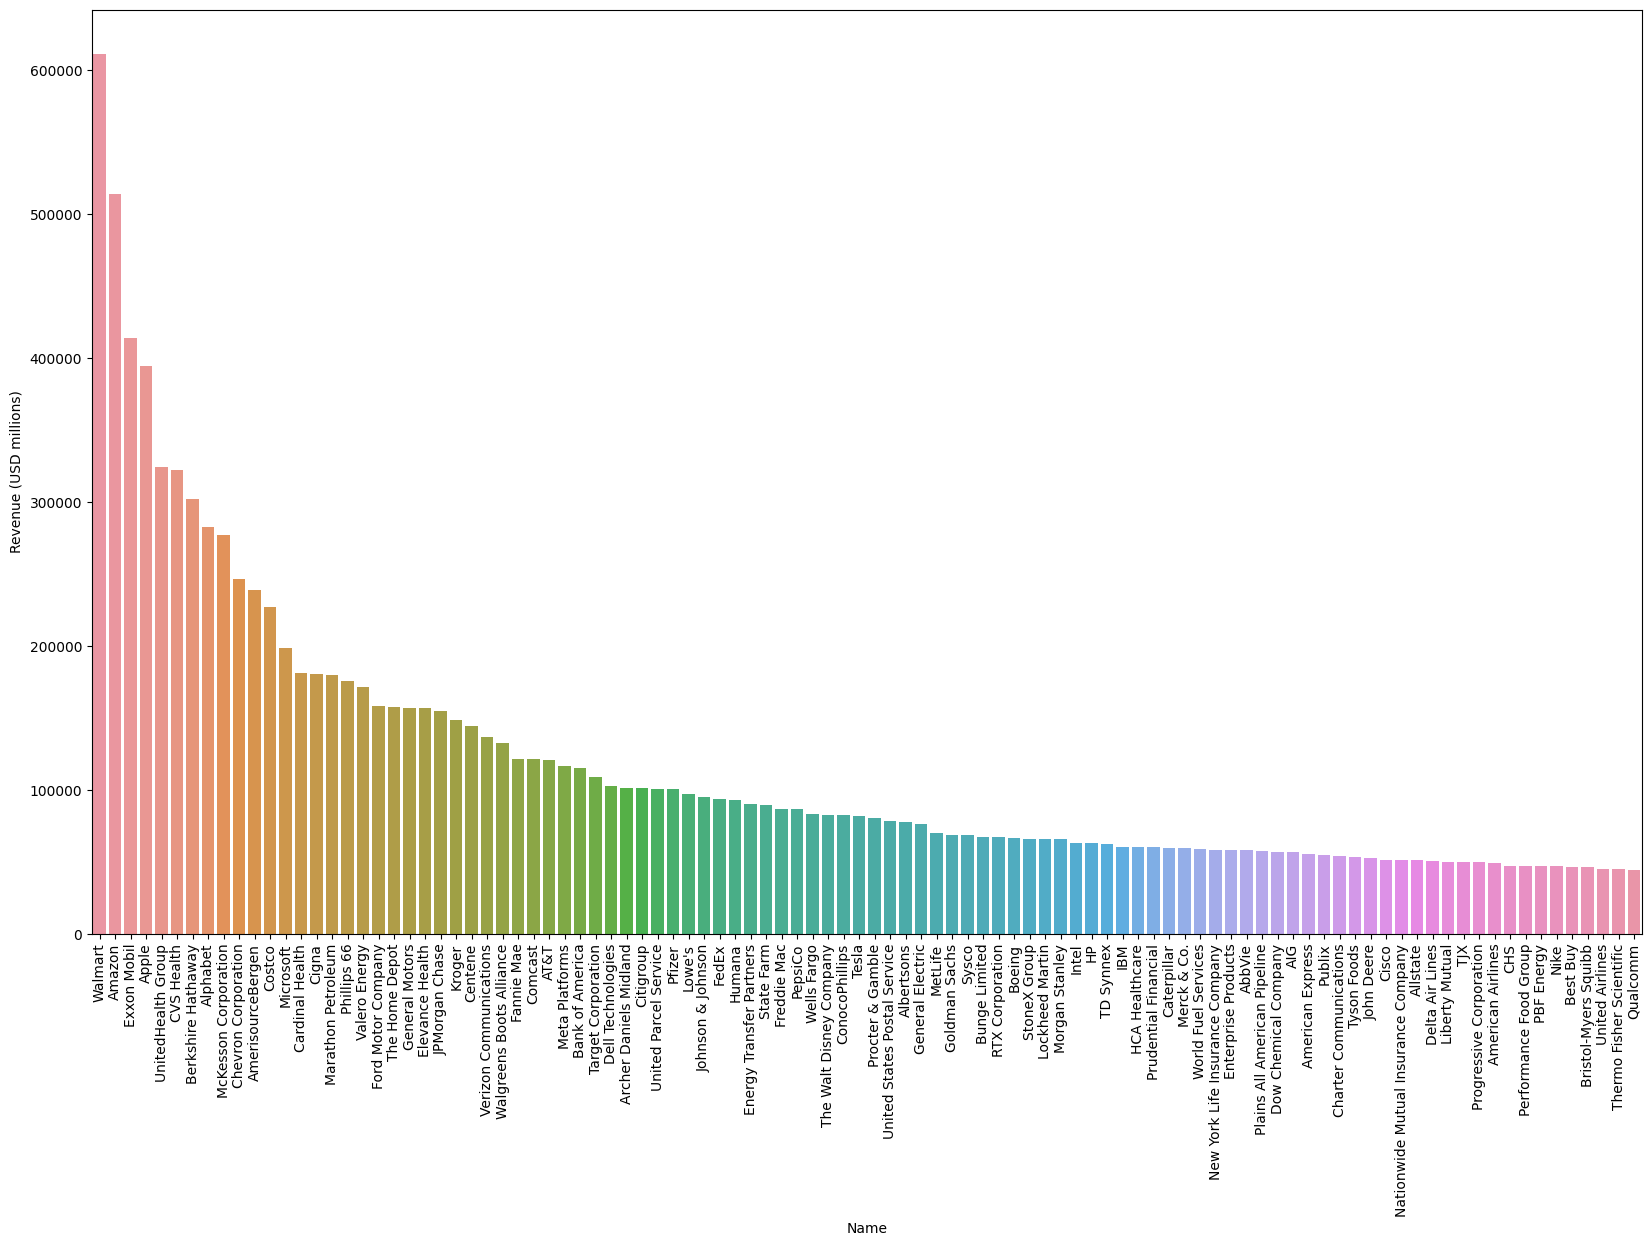

In [78]:
plt.figure(figsize=(20, 12))
sns.barplot(x = 'Name' , y = 'Revenue (USD millions)' , data = df)
plt.xticks(rotation = 90)
plt.show()

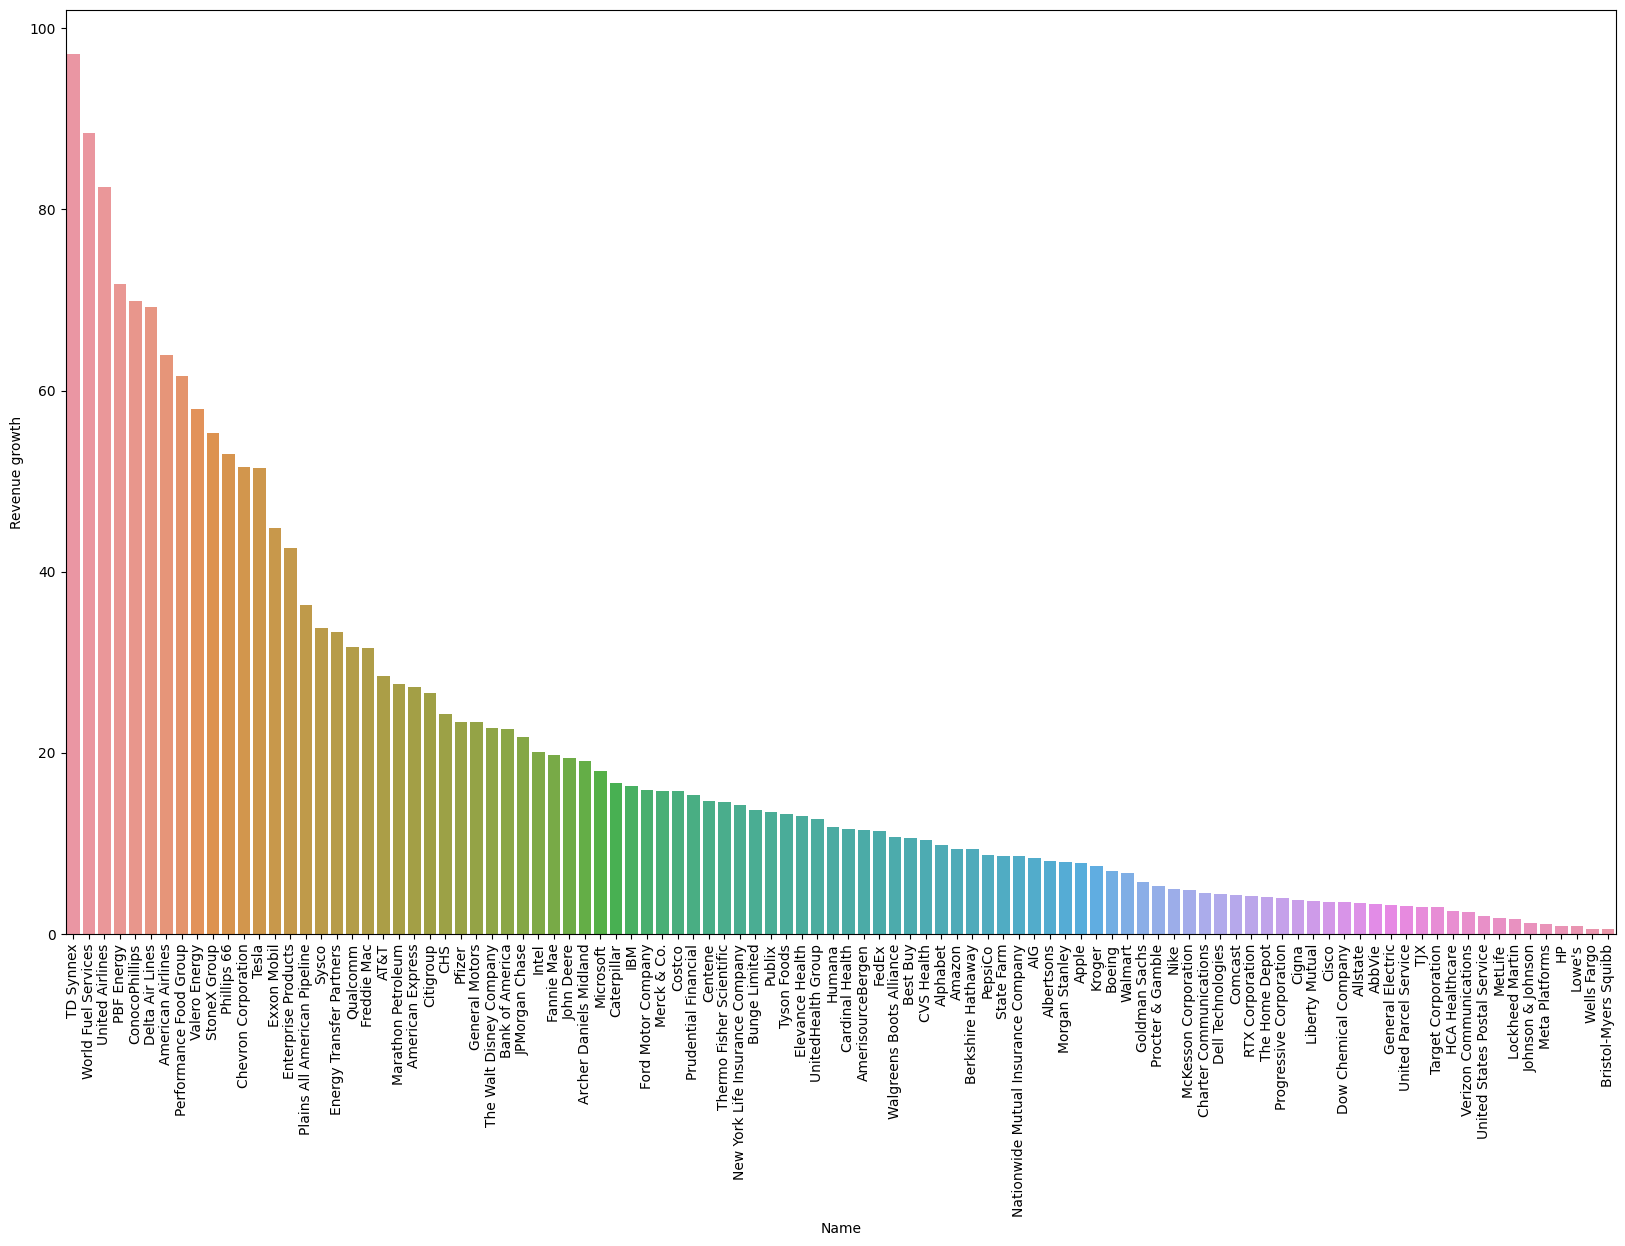

In [105]:
plt.figure(figsize=(20, 12))
sorted_df = df.sort_values(by = 'Revenue growth' , ascending = False)
sns.barplot(x = 'Name' , y = 'Revenue growth' , data = sorted_df)
plt.xticks(rotation = 90)
plt.show()

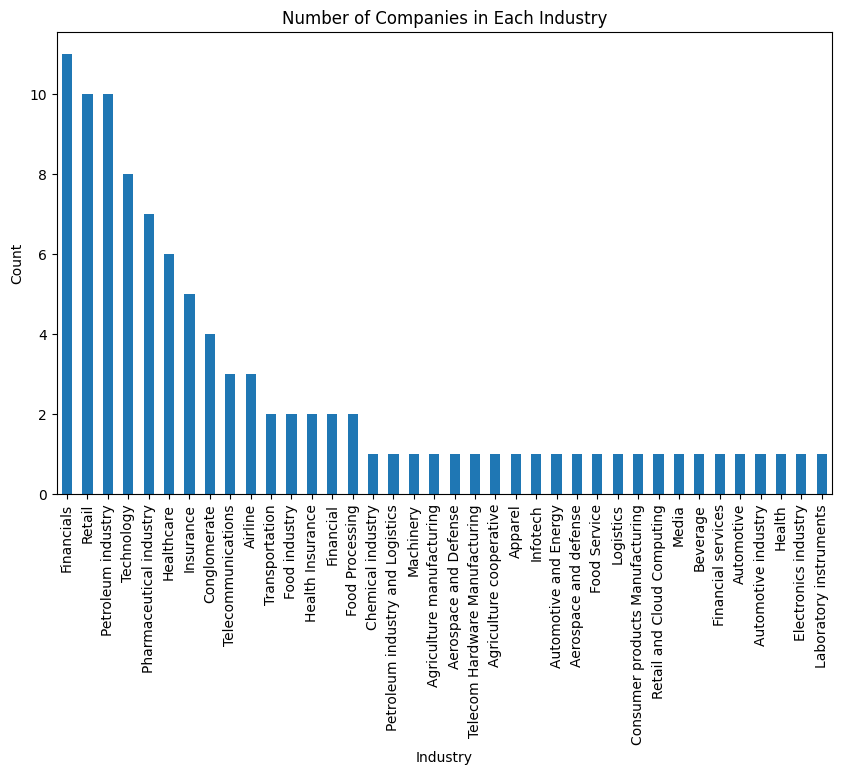

In [88]:
industry_counts = df['Industry'].value_counts()
plt.figure(figsize = (10,6))
industry_counts.plot(kind = 'bar')
plt.title('Number of Companies in Each Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

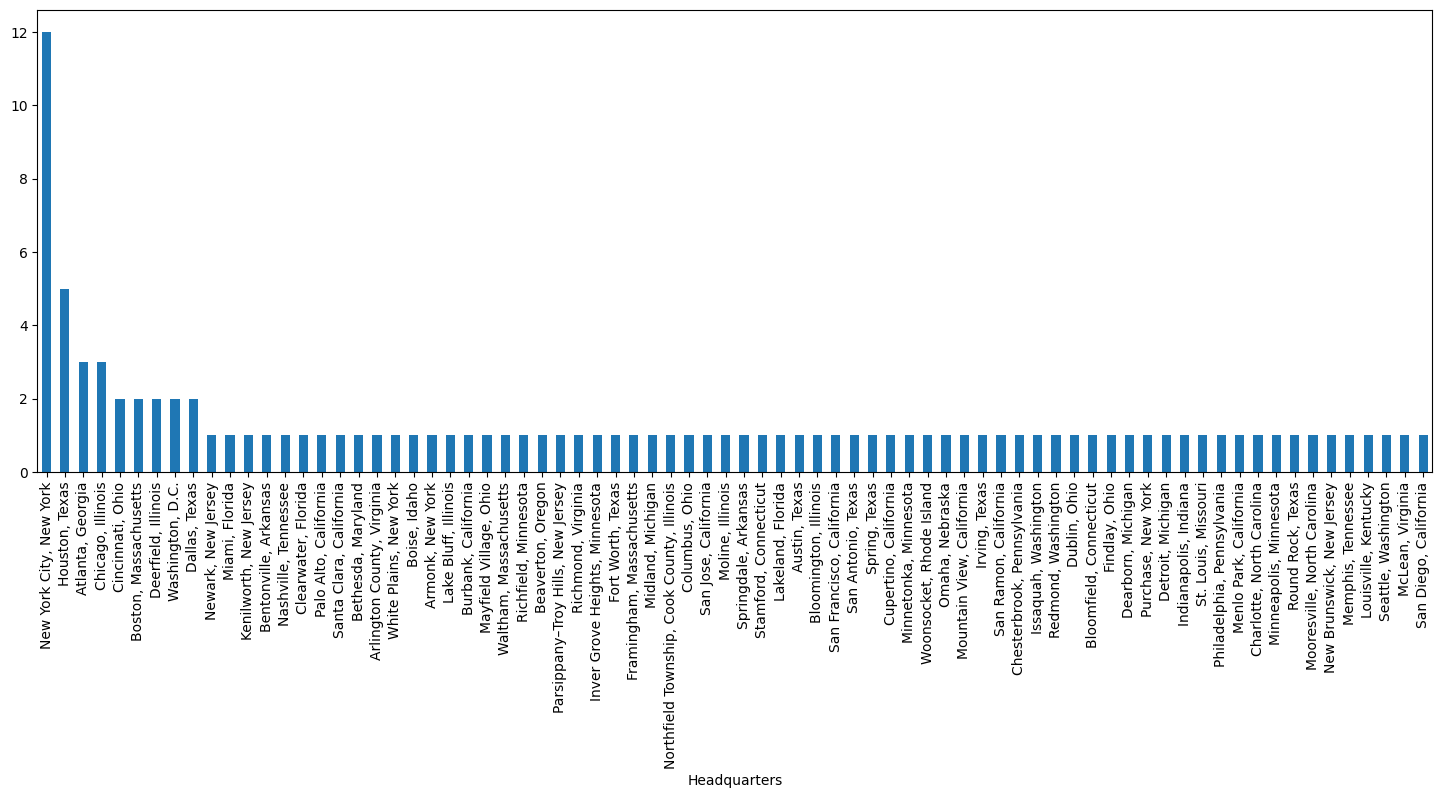

In [99]:
plt.figure(figsize = (18,6))
location_counts = df['Headquarters'].value_counts()
location_counts.plot(kind = 'bar')
plt.show()

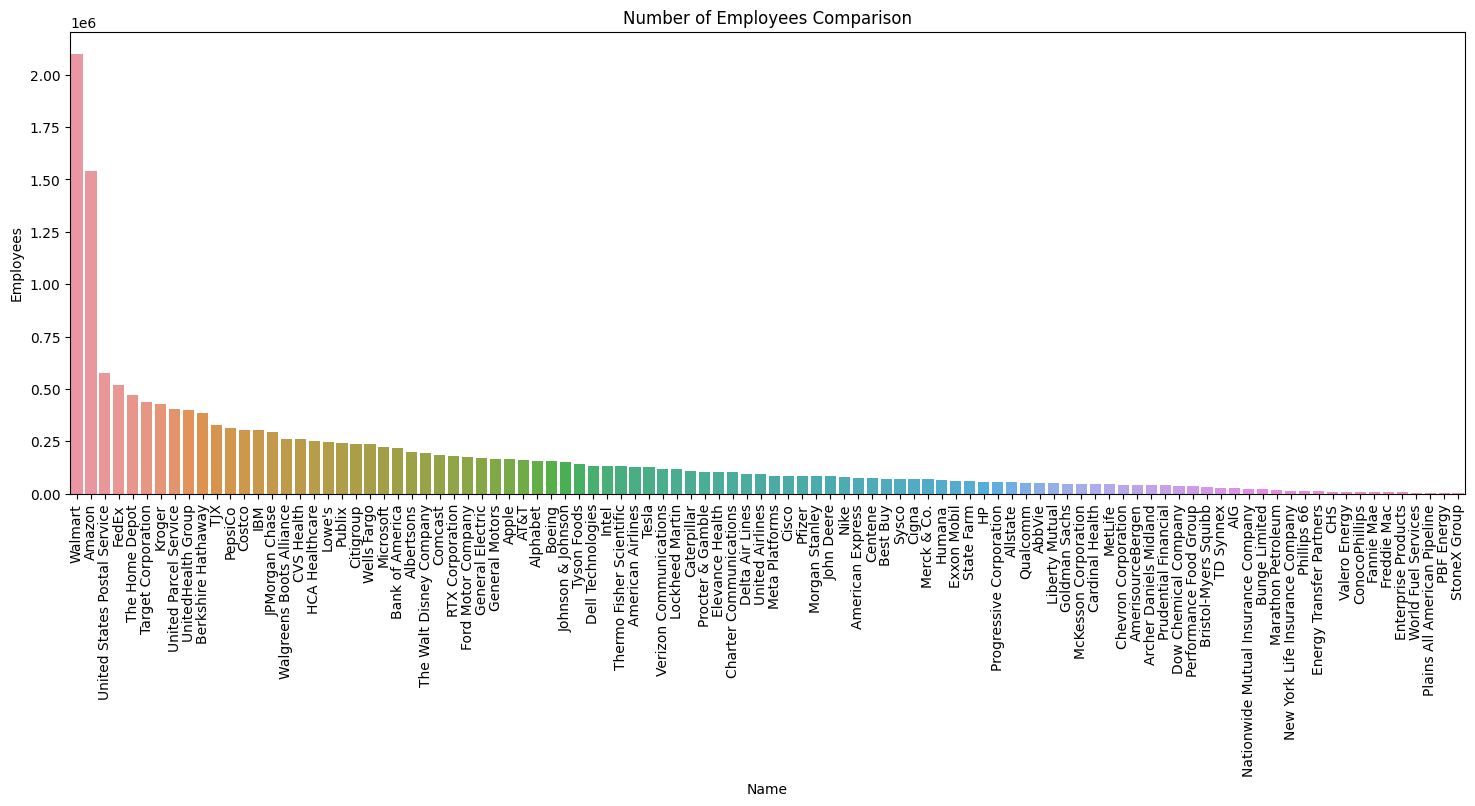

In [110]:
# 7. Employee Analysis
plt.figure(figsize=(18, 6))
sorted_df = df.sort_values(by = 'Employees' , ascending = False)
sns.barplot(x='Name', y='Employees', data=sorted_df)
plt.xticks(rotation=90)
plt.title('Number of Employees Comparison')
plt.show()

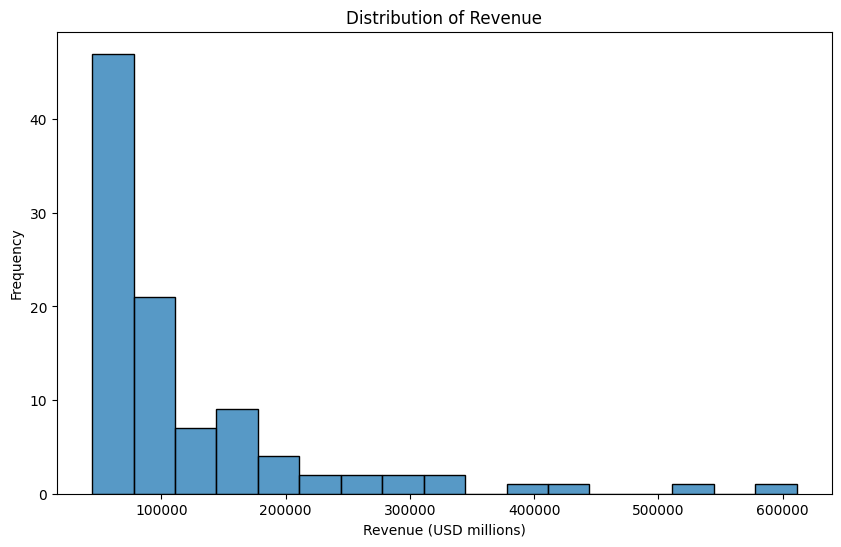

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue (USD millions)'])
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (USD millions)')
plt.ylabel('Frequency')
plt.show()

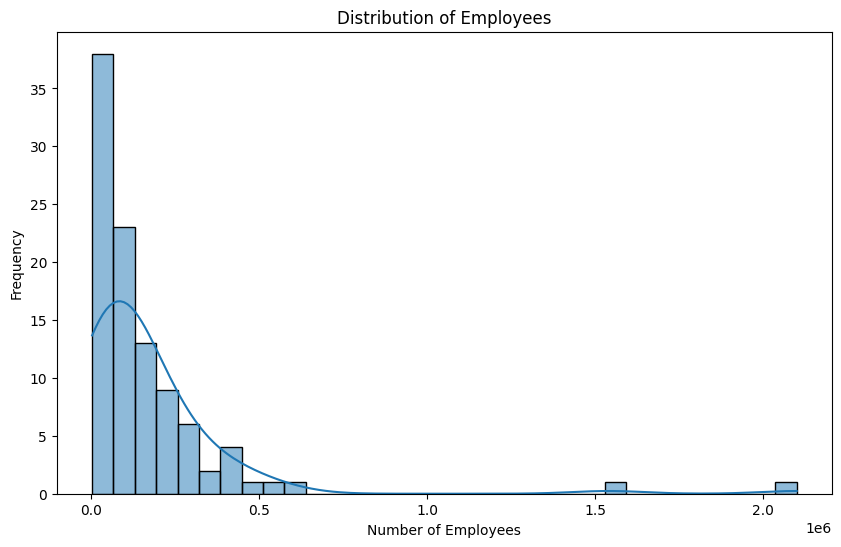

In [117]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Employees'], kde=True)
plt.title('Distribution of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()